In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
df = pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# EDA

In [4]:
df.shape

(1000, 40)

We have 1000 rows and 40 columns in the dataset

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

We have various object type variables and int type variables in the dataset

In [6]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


We can observe that scaling for the dataset will be required as the value range between columns is huge

In [7]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39


No duplicate value is present in dataset

In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [9]:
obj_columns=['policy_bind_date',
       'policy_state', 'policy_csl',
       'policy_annual_premium', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship','incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage',  'police_report_available', 'auto_make',
       'auto_model', 'fraud_reported']

In [10]:
for i in obj_columns:
    print("----"+i+"----\n")
    print(df[i].value_counts())

----policy_bind_date----

28-04-1992    3
05-08-1992    3
01-01-2006    3
28-12-2002    2
11-11-1998    2
             ..
11-05-1996    1
27-10-2001    1
18-06-2011    1
12-11-2009    1
12-05-2007    1
Name: policy_bind_date, Length: 951, dtype: int64
----policy_state----

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
----policy_csl----

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
----policy_annual_premium----

1374.22    2
1558.29    2
1389.13    2
1073.83    2
1074.07    2
          ..
1268.79    1
1558.86    1
722.66     1
1302.40    1
1212.00    1
Name: policy_annual_premium, Length: 991, dtype: int64
----insured_sex----

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
----insured_education_level----

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
----insured_occupation----

machine-op-inspc

We can observe that few object type columns contains ? which is represented as missing value. We will convert it into null value

In [11]:
df.replace('?', np.nan, inplace = True)

We have successfully replaced the ? value with NaN values

# Removing Null values

In [12]:
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)            

# Removing the columns which are not required for the prediction

In [13]:
df.drop(['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39'],axis=1,inplace=True)

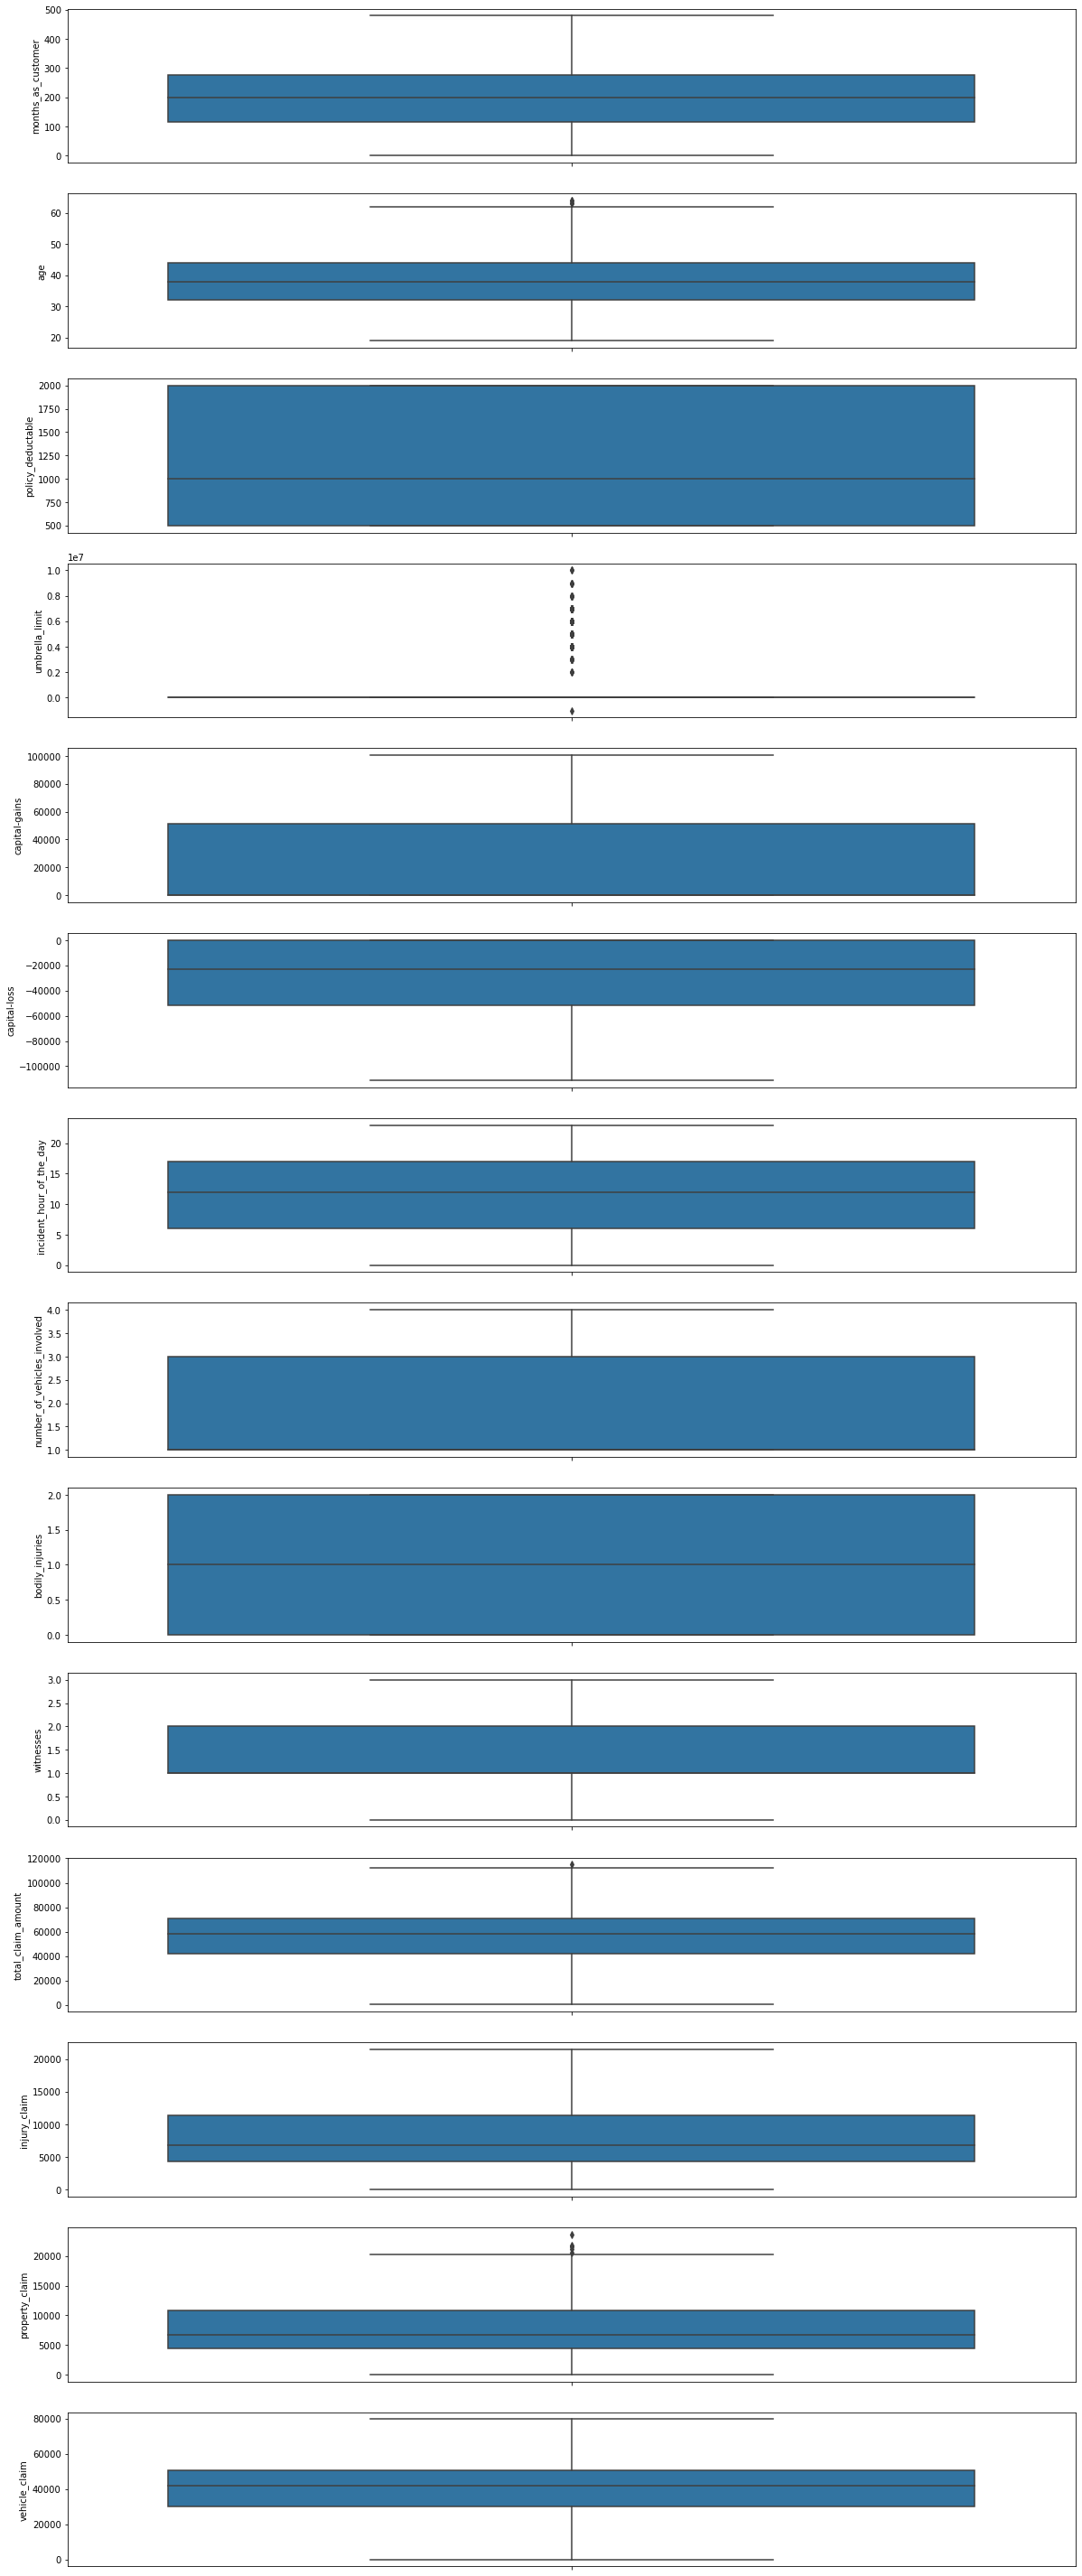

In [14]:

counter=1
plt.figure(figsize=(20,150))
columns = ['months_as_customer', 'age', 'policy_deductable',
       'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries'
          , 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.boxplot(y=columns[i],hue = columns[i],data=df)
        #sns.boxplot(df[columns[i]])

Outliers are present in property_claim, total_claim_amount, umbrella_limit, age

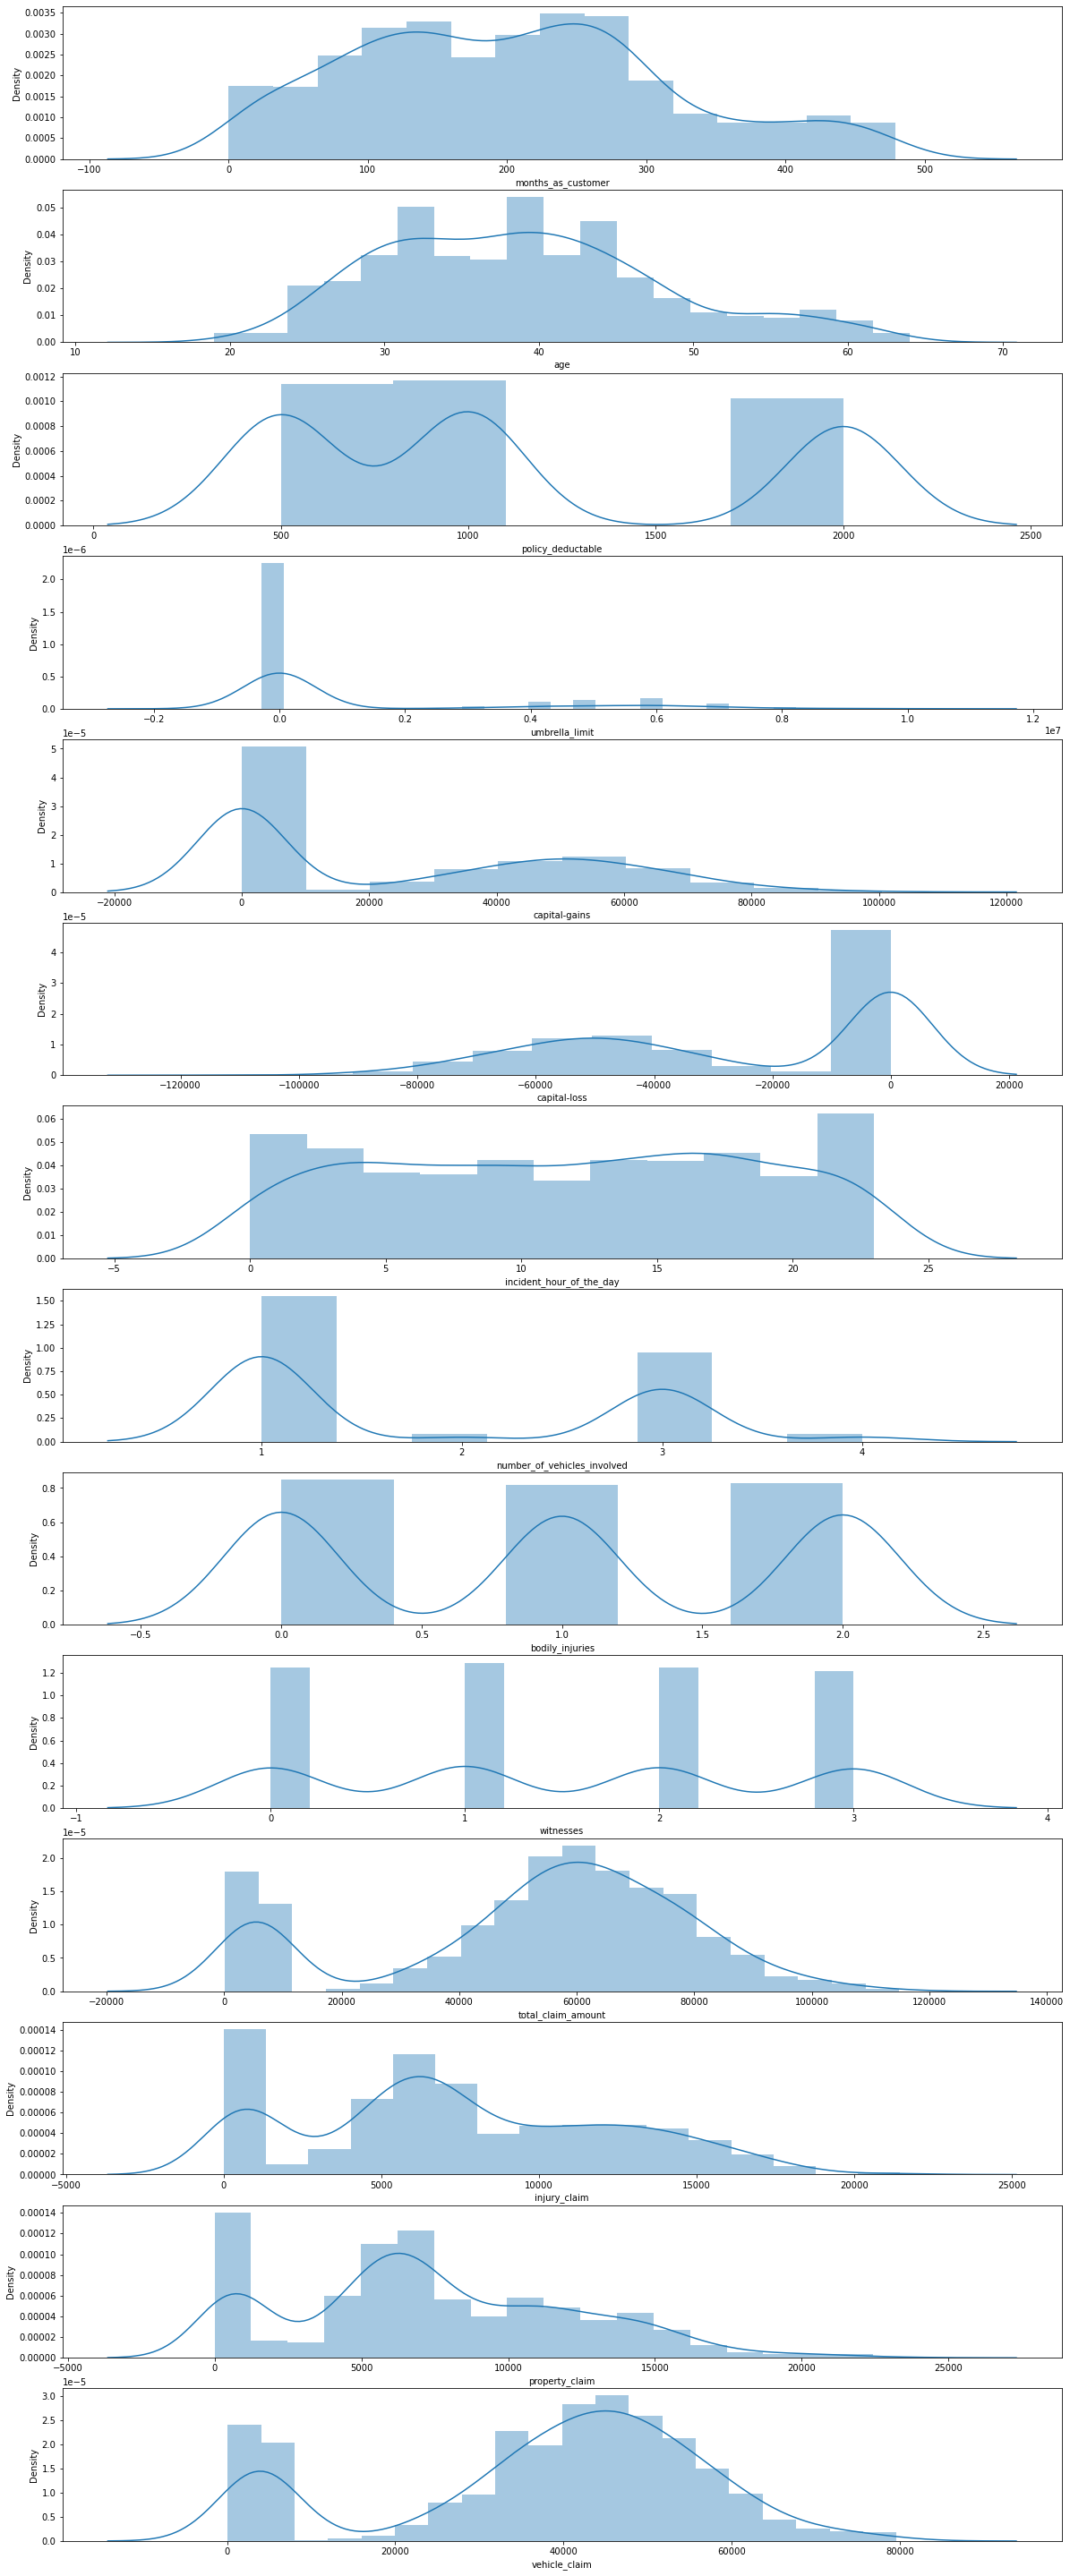

In [15]:

counter=1
plt.figure(figsize=(20,150))
columns = ['months_as_customer', 'age', 'policy_deductable',
       'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries'
          , 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.distplot(df[columns[i]])

policy_deductable, capital-gains, capital-loss, number_of_vehicles_involved, bodily_injuries, witness, total_claim_amount, injnury_claim, property_claim, vehicle_claim are not normally distributed

<AxesSubplot:>

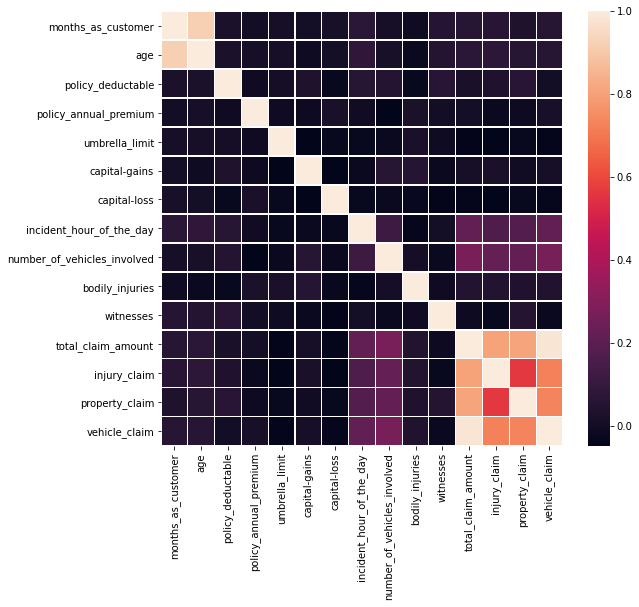

In [16]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, linewidths = 0.1)

We can observe that their is very strong correlation between vehicle_claim and total_claim_amount

Dropping the total_claim_amount column as this is providing values with the correlation with vehicle_claim

In [17]:
df.drop(['total_claim_amount'], inplace = True, axis = 1)

In [18]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

No Null values are their in the dataset

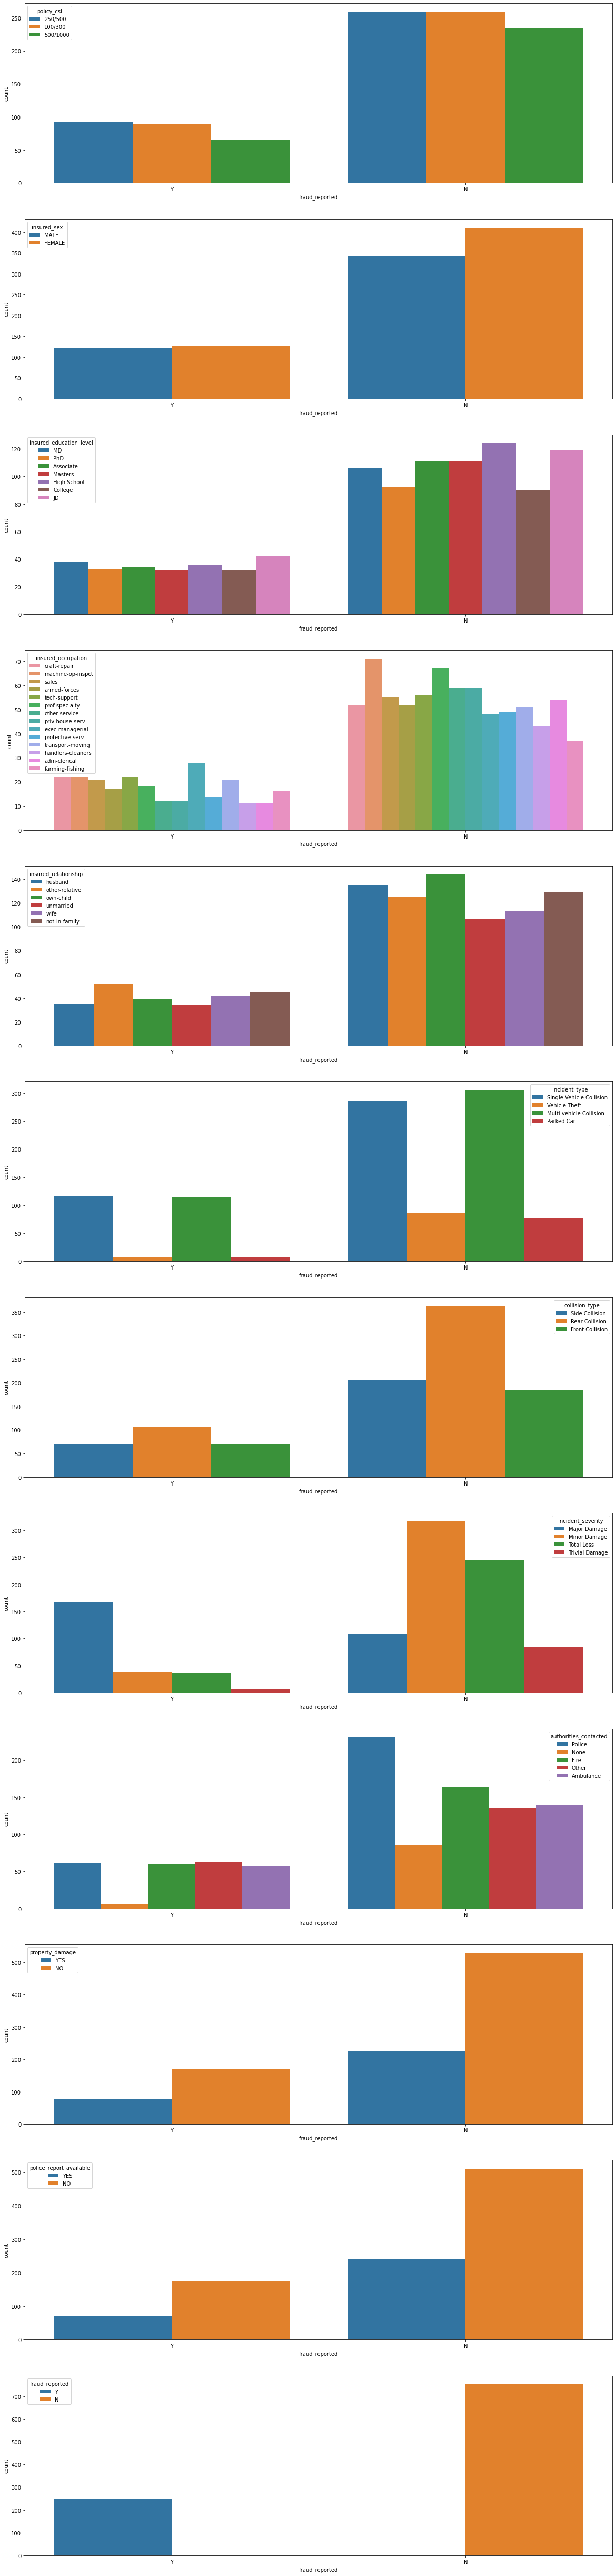

In [19]:
counter=1;
cols =[ 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
        'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'property_damage', 
       'police_report_available', 'fraud_reported']
plt.figure(figsize=(20,300))
for column in cols:
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.countplot(x='fraud_reported',hue=column,data=df)        

    Observations:
        Most of the fraud cases were reported in 250/500 policy_csl
        differnet education levels of user did approximately equal count of frauds
        peoples with exec_mangerial position did most of the frauds
        other relative did frauds more as compared to other relations
        single vehicle collision and mutli vehicle collision have almost same number of occurence to be fraud
        Rear collision accident mostly is not fraud
        when authority contacted is police their is high chance it will not be fraud
        if their is property damage their is high chance it is not fraud
        The Target variable fraud_reported is highly unbalanced, We will be required to fix this before building model

# Removing outliers

In [20]:
columns =  [ 'age',
       'umbrella_limit', 'property_claim']
for i in columns:
    IQR = df[i].quantile(0.75)-df[i].quantile(0.25)
    Barmax =  df[i].quantile(0.75) + 1.5*IQR
    Barmin =  df[i].quantile(0.25) - 1.5*IQR
    df.loc[df[i]>Barmax,i] = Barmax
    df.loc[df[i]<Barmin,i] = Barmin

# confirming removal of outliers

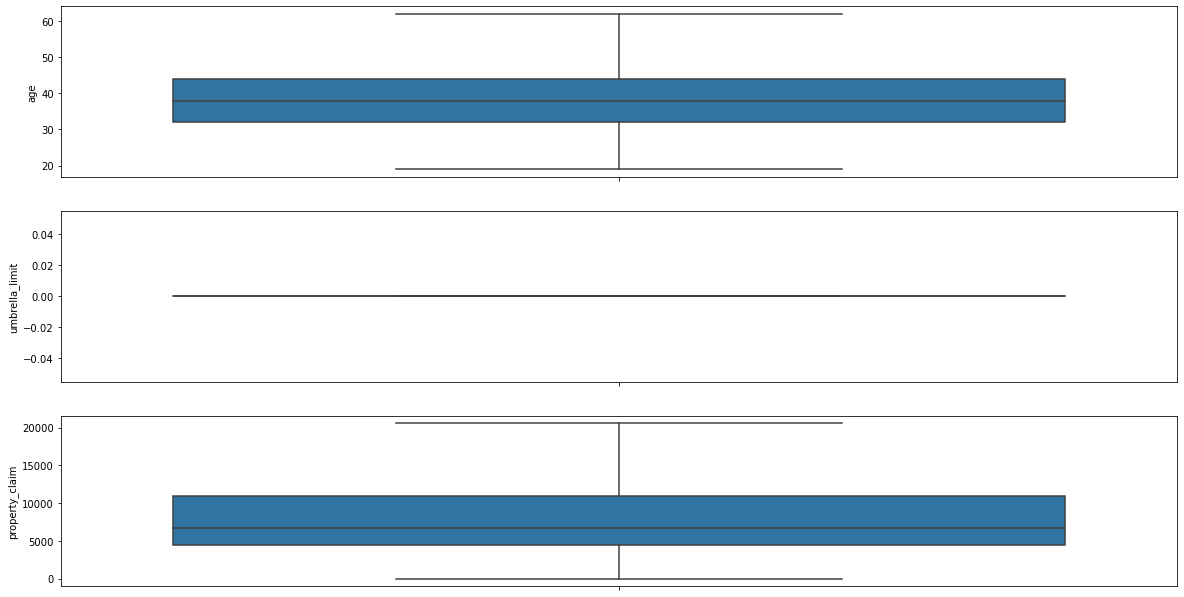

In [21]:

counter=1
plt.figure(figsize=(20,150))
columns = ['age',
       'umbrella_limit', 'property_claim']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.boxplot(y=columns[i],hue = columns[i],data=df)
        #sns.boxplot(df[columns[i]])

Outliers are successfully removed

# Converting Catagorical variables into labels

In [22]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in ['policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
        'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'property_damage', 
       'police_report_available', 'fraud_reported']:
    df[col] =  LE.fit_transform(df[col])

# Scaling the data

In [23]:
fin_df = df.drop(['policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
        'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'property_damage', 
       'police_report_available', 'fraud_reported'],axis=1)

In [24]:
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(fin_df)
final_df = pd.DataFrame(minmax_df, columns = fin_df.columns)

# Checking the skewness

In [25]:
final_df.skew()

months_as_customer             0.362177
age                            0.469878
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 0.000000
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
injury_claim                   0.264811
property_claim                 0.348531
vehicle_claim                 -0.621098
dtype: float64

# Removing the skewness from vehicle_claim, number_of_vehicles_involved

In [26]:
fin_df_new=power_transform(final_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=final_df.columns)

# confirming removal of skewness

In [28]:
fin_df_new.skew()

months_as_customer             0.002576
age                            0.011807
policy_deductable              0.109346
policy_annual_premium          0.002351
umbrella_limit                 0.000000
capital-gains                  0.213178
capital-loss                  -0.222452
incident_hour_of_the_day      -0.071272
number_of_vehicles_involved    0.368118
bodily_injuries               -0.078977
witnesses                     -0.073142
injury_claim                  -0.002981
property_claim                 0.001453
vehicle_claim                 -0.110088
dtype: float64

Skewness is removed

In [29]:
fin_df_new = fin_df_new.join(df['policy_csl'])
fin_df_new = fin_df_new.join(df['insured_sex'])
fin_df_new = fin_df_new.join(df['insured_education_level'])
fin_df_new = fin_df_new.join(df['insured_occupation'])
fin_df_new = fin_df_new.join(df['insured_relationship'])
fin_df_new = fin_df_new.join(df['incident_type'])
fin_df_new = fin_df_new.join(df['collision_type'])
fin_df_new = fin_df_new.join(df['incident_severity'])
fin_df_new = fin_df_new.join(df['authorities_contacted'])
fin_df_new = fin_df_new.join(df['property_damage'])
fin_df_new = fin_df_new.join(df['police_report_available'])
fin_df_new = fin_df_new.join(df['fraud_reported'])

# final dataset

In [30]:
fin_df_new.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,1.077347,1.014445,0.015332,0.616891,0.0,1.079259,0.984411,-0.953299,-0.842931,0.073878,...,4,2,0,2,2,0,4,1,1,1
1,0.295263,0.432151,1.301776,-0.242204,0.0,-0.948684,0.984411,-0.512577,-0.842931,-1.239891,...,4,6,2,3,1,1,4,0,0,1
2,-0.556002,-1.143132,1.301776,0.642408,0.0,0.617972,0.984411,-0.658774,1.189298,1.196780,...,6,11,3,0,1,1,4,0,0,0
3,0.525599,0.327563,1.301776,0.653057,0.0,0.981214,-1.246531,-0.953299,-0.842931,0.073878,...,6,1,4,2,0,0,4,0,0,1
4,0.295263,0.634552,0.015332,1.341701,0.0,1.324683,-0.776914,1.195016,-0.842931,-1.239891,...,0,11,4,3,1,1,2,0,0,0


# Train-Test split

In [31]:
x = fin_df_new.drop(["fraud_reported"],axis=1)
y = fin_df_new["fraud_reported"]

In [32]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on Random State",maxRS)

Best Accuracy is 0.78 on Random State 108


In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=108)

# SMOTE

In [35]:
print("Before OverSampling '1': {}".format(sum(y_train == 1)))
print("Before OverSampling '0': {} \n".format(sum(y_train == 0)))
  

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print("After OverSampling '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling '0': {}".format(sum(y_train_res == 0)))

Before OverSampling '1': 203
Before OverSampling '0': 597 

After OverSampling '1': 597
After OverSampling '0': 597


# model building

--------logistic regression--------

In [36]:

LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)
pred = LogReg.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       156
           1       0.57      0.39      0.46        44

    accuracy                           0.80       200
   macro avg       0.70      0.65      0.67       200
weighted avg       0.78      0.80      0.79       200



--------Decision tree--------

In [37]:

DTC = DecisionTreeClassifier()
DTC.fit(x_train_res,y_train_res)
pred = DTC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       156
           1       0.35      0.41      0.38        44

    accuracy                           0.70       200
   macro avg       0.59      0.60      0.59       200
weighted avg       0.72      0.70      0.71       200



--------Random Forest--------

In [38]:

RFC = RandomForestClassifier()
RFC.fit(x_train_res,y_train_res)
pred = RFC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       156
           1       0.64      0.66      0.65        44

    accuracy                           0.84       200
   macro avg       0.77      0.78      0.78       200
weighted avg       0.85      0.84      0.85       200



--------Naive Bayes--------

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_res, y_train_res)
pred = gnb.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       156
           1       0.42      0.68      0.52        44

    accuracy                           0.73       200
   macro avg       0.66      0.71      0.66       200
weighted avg       0.79      0.72      0.74       200



--------SVM--------

In [40]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)

clf.fit(x_train_res, y_train_res.ravel()) 
pred = clf.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       156
           1       0.47      0.70      0.56        44

    accuracy                           0.76       200
   macro avg       0.69      0.74      0.70       200
weighted avg       0.81      0.76      0.77       200



# Cross validation score

In [42]:
print("Decision tree : "+str(cross_val_score(DTC,x,y,cv=5).mean()))

Decision tree : 0.73


In [43]:
print("Random Forest : "+str(cross_val_score(RFC,x,y,cv=5).mean()))

Random Forest : 0.7769999999999999


In [45]:
print("Logistic Regression : "+str(cross_val_score(LogReg,x,y,cv=5).mean()))

Logistic Regression : 0.7769999999999999


In [46]:
print("Naive Bayes : "+str(cross_val_score(gnb,x,y,cv=5).mean()))

Naive Bayes : 0.762


In [47]:
print("SVM : "+str(cross_val_score(clf,x,y,cv=5).mean()))

SVM : 0.764


    Observations:
        Logistic Regression : 0.80 - 0.77 = 0.03
        Decision Tree : 0.70-0.73 = 0.03
        Random Forest : 0.84-0.77 =0.07
        Naive Bayes :  0.73-0.76 = 0.03
        SVM : 0.76-0.76 = 0.00
        
        We can see that SVM model will be good acc to cross validation score, But we can see that f1 score, precision, recall, Accuracy of Random Forest is best from all the tested models. So we will choose Random Forest for the hypertuning

# Parameter Hypertuning

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
parameter = {
 'max_depth': [300,600,800,1000],
 'min_samples_split': [2,4,8],
    'bootstrap': [True, False],
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': [100, 400, 600, 1000]
    
}
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5)


In [51]:
GCV.fit(x_train_res,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [300, 600, 800, 1000],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [100, 400, 600, 1000]})

In [52]:
GCV.best_params_

{'bootstrap': False,
 'max_depth': 300,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

# Building Final model

In [53]:
Final_model = RandomForestClassifier(min_samples_leaf=1,max_depth=300,min_samples_split=2,n_estimators=400,bootstrap=False)
Final_model.fit(x_train_res,y_train_res)
pred = Final_model.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       156
           1       0.64      0.57      0.60        44

    accuracy                           0.83       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.83      0.83      0.83       200



recall for 0 has increased, precision for 1 is increased after hypertuning

# AUC - ROC curve

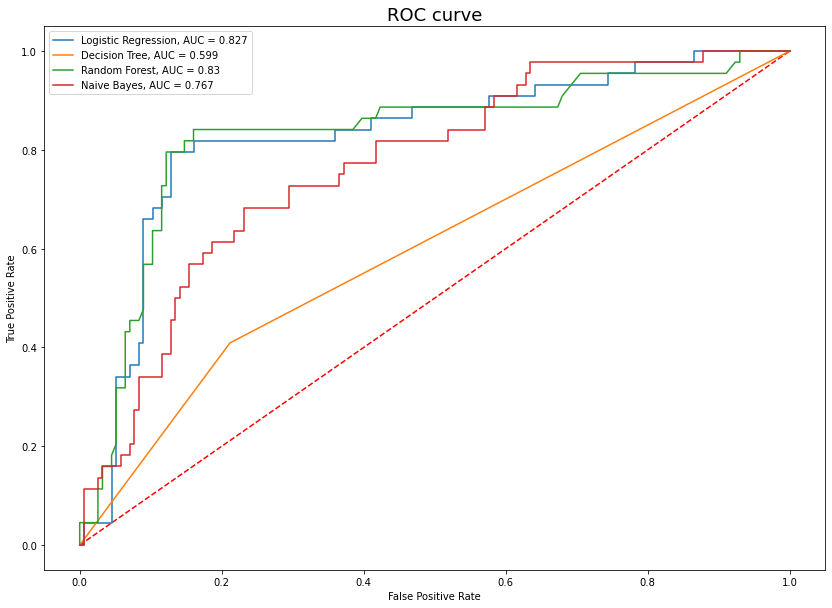

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fig = plt.figure(figsize=(14,10))
plt.plot([0, 1], [0, 1],'r--')
#KNN

#Logistic Regression
preds_proba_lg = LogReg.predict_proba(x_test)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')

#Decision Tree Classifier
preds_proba_DTC = DTC.predict_proba(x_test)
probsDTC = preds_proba_DTC[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsDTC)
aucDTC = roc_auc_score(y_test, probsDTC)
plt.plot(fpr, tpr, label=f'Decision Tree, AUC = {str(round(aucDTC,3))}')

#Random Forest
preds_proba_RFC = Final_model.predict_proba(x_test)
probsRFC = preds_proba_RFC[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsRFC)
aucRFC = roc_auc_score(y_test, probsRFC)
plt.plot(fpr, tpr, label=f'Random Forest, AUC = {str(round(aucRFC,3))}')

#Naive Bayes
preds_proba_gnb = gnb.predict_proba(x_test)
probsgnb = preds_proba_gnb[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsgnb)
aucgnb = roc_auc_score(y_test, probsgnb)
plt.plot(fpr, tpr, label=f'Naive Bayes, AUC = {str(round(aucgnb,3))}')


plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

# Saving the model

In [64]:
import joblib
joblib.dump(Final_model,"Insurance Fraud.pkl")


['Insurance Fraud.pkl']